In [3]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command 
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 

Using TensorFlow backend.


In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [5]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 139s 2ms/step - loss: 0.2830 - acc: 0.9140 - val_loss: 0.0567 - val_acc: 0.9820
Epoch 2/12
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0944 - acc: 0.9720 - val_loss: 0.0442 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0696 - acc: 0.9791 - val_loss: 0.0391 - val_acc: 0.9872
Epoch 4/12
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0592 - acc: 0.9826 - val_loss: 0.0348 - val_acc: 0.9887
Epoch 5/12
60000/60000 [============

## 3-Layered CNN

In [0]:
nb_epoch=epochs

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', 
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 128)        

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 193s 3ms/step - loss: 0.4483 - acc: 0.8660 - val_loss: 0.1388 - val_acc: 0.9587
Epoch 2/12
60000/60000 [==============================] - 192s 3ms/step - loss: 0.2542 - acc: 0.9321 - val_loss: 0.1136 - val_acc: 0.9658
Epoch 3/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.2226 - acc: 0.9436 - val_loss: 0.0964 - val_acc: 0.9704
Epoch 4/12
60000/60000 [==============================] - 194s 3ms/step - loss: 0.2214 - acc: 0.9461 - val_loss: 0.0792 - val_acc: 0.9772
Epoch 5/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.2153 - acc: 0.9491 - val_loss: 0.0769 - val_acc: 0.9777
Epoch 6/12
60000/60000 [==============================] - 191s 3ms/step - loss: 0.2184 - acc: 0.9508 - val_loss: 0.0950 - val_acc: 0.9765
Epoch 7/12
60000/60000 [==============================] - 195s 3ms/step - loss: 0.2109 - acc: 0.9516 - val_loss: 0.0847 - 

Test score: 0.09575681054808083
Test accuracy: 0.9757


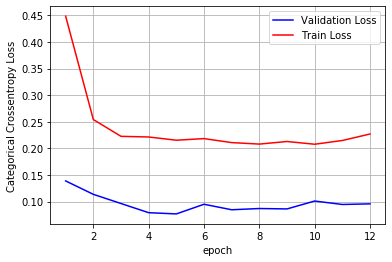

In [9]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss') 

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
from keras.layers.normalization import BatchNormalization


## 5-Layered CNN

In [11]:
model1=Sequential() # Initializing the model

# First ConvNet
model1.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape))

model1.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#Second Convnet
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(256,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fourth Convnet
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Conv2D(512,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fifth Convnet
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())

#hidden_layer
model1.add(Dense(256,
                   activation='relu',
                   kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(num_classes,activation='softmax'))
print(model1.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 128)       

In [0]:
nb_epoch=epochs

In [13]:
model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history=model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1603s 27ms/step - loss: 2.2639 - acc: 0.2380 - val_loss: 1.7023 - val_acc: 0.3878
Epoch 2/12
59904/60000 [============================>.] - ETA: 2s - loss: 1.2122 - acc: 0.5656Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 1603s 27ms/step - loss: 2.2639 - acc: 0.2380 - val_loss: 1.7023 - val_acc: 0.3878
Epoch 2/12
60000/60000 [==============================] - 1613s 27ms/step - loss: 1.2117 - acc: 0.5659 - val_loss: 0.7741 - val_acc: 0.7540
Epoch 3/12
Epoch 3/12
60000/60000 [==============================] - 1629s 27ms/step - loss: 0.8645 - acc: 0.7047 - val_loss: 0.5902 - val_acc: 0.7989
Epoch 4/12
Epoch 4/12
60000/60000 [==============================] - 1633s 27ms/step - loss: 0.7399 - acc: 0.7510 - val_loss: 0.4974 - val_acc: 0.8326
Epoch 5/12
Epoch 5/12
60000/60000 [==============================] - 1635s 27ms/step

Test score: 0.32503178759813306
Test accuracy: 0.8912
Test score: 0.32503178759813306
Test accuracy: 0.8912
Test score: 0.32503178759813306
Test accuracy: 0.8912
Test score: 0.32503178759813306
Test accuracy: 0.8912
Test score: 0.32503178759813306
Test accuracy: 0.8912
Test score: 0.32503178759813306
Test accuracy: 0.8912


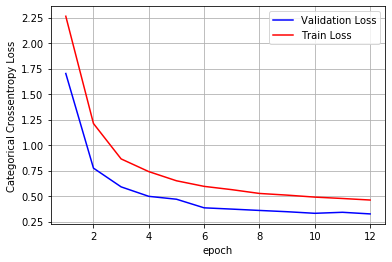

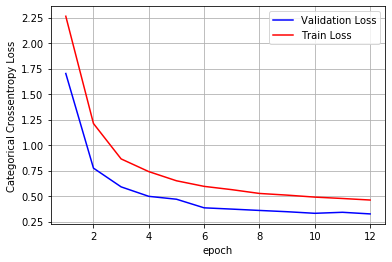

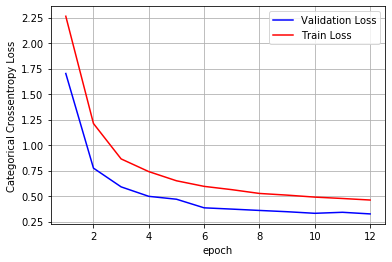

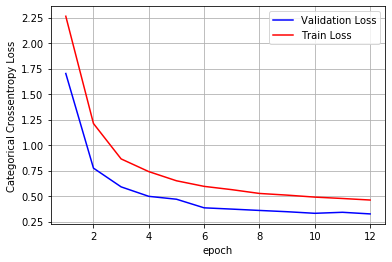

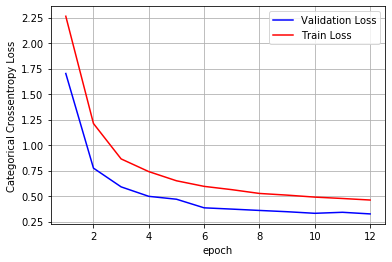

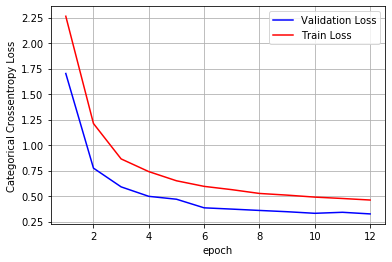

In [14]:
score = model1.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
from keras.initializers import he_normal


## 7-Layered CNN

In [20]:
model7=Sequential() # Initializing the model

# First ConvNet
model7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))


model7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))#Second Convnet
#model7.add(MaxPooling2D(pool_size=(2,2)))
#model7.add(Dropout(0.25))

model7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
#model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Dropout(0.15))

model7.add(Conv2D(96,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fourth Convnet
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Dropout(0.39))
model7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fifth Convnet
model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Dropout(0.3))
model7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#sixth Convnet
model7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))#seventh Convnet

model7.add(MaxPooling2D(pool_size=(2,2)))
model7.add(Dropout(0.4))
model7.add(Flatten())

#hidden_layer
model7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)))#1 hidden layer
model7.add(BatchNormalization())
model7.add(Dropout(0.5))
model7.add(Dense(148,
                   activation='relu',
                   kernel_initializer=RandomNormal(mean=0.0, stddev=0.4, seed=None)))#2 hidden layer
model7.add(BatchNormalization())
model7.add(Dropout(0.5))
model7.add(Dense(128,
                   activation='relu',
                  kernel_initializer=RandomNormal(mean=0.0, stddev=0.58, seed=None)))#3 hidden layer
model7.add(BatchNormalization())
model7.add(Dropout(0.5))
model7.add(Dense(num_classes,activation='softmax'))
print(model7.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_22 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 96)        24672     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 7, 7, 96)         

In [21]:
model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history=model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 139s 2ms/step - loss: 2.5590 - acc: 0.1444 - val_loss: 2.2081 - val_acc: 0.1513
Epoch 2/12
60000/60000 [==============================] - 136s 2ms/step - loss: 1.7260 - acc: 0.3351 - val_loss: 1.2023 - val_acc: 0.5579
Epoch 3/12
60000/60000 [==============================] - 138s 2ms/step - loss: 1.1965 - acc: 0.5705 - val_loss: 0.6982 - val_acc: 0.7830
Epoch 4/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.8984 - acc: 0.7021 - val_loss: 0.5069 - val_acc: 0.8267
Epoch 5/12
60000/60000 [==============================] - 138s 2ms/step - loss: 0.7502 - acc: 0.7632 - val_loss: 0.4341 - val_acc: 0.8462
Epoch 6/12
60000/60000 [==============================] - 135s 2ms/step - loss: 0.6602 - acc: 0.7950 - val_loss: 0.3656 - val_acc: 0.8845
Epoch 7/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.6003 - acc: 0.8143 - val_loss: 0.3462 - 

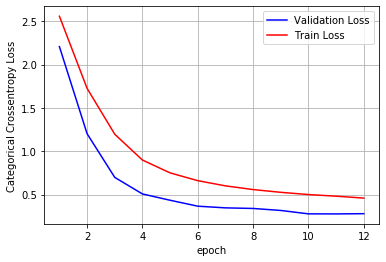

In [23]:

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Conclusion

In [0]:
from prettytable import PrettyTable

In [27]:
x=PrettyTable()

x.field_names=(['No of layers','Test Score','Accuracy'])

x.add_row(['3-Layered CNN',0.095,0.975])
x.add_row(['5-Layered CNN',0.3,0.891])
x.add_row(['7-Layered CNN',0.09,0.975])

print(x)

+---------------+------------+----------+
|  No of layers | Test Score | Accuracy |
+---------------+------------+----------+
| 3-Layered CNN |   0.095    |  0.975   |
| 5-Layered CNN |    0.3     |  0.891   |
| 7-Layered CNN |    0.09    |  0.975   |
+---------------+------------+----------+


**We can conclude that by using Convolution Neural Network, the accuracy by using 3 layered and 7 layered shown well comparedd to 5-Layered CNN**